In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy
from matplotlib import pylab, cm
%matplotlib inline
import pylab
from numpy import array, pi,linspace
from astropy.io import fits
import math
from math import log
from astropy.table import Table
import pyfits

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pyfits/__init__.py:22: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  PyFITSDeprecationWarning)  # noqa


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
#t = Table.read('adjusted.fits', format='fits')

In [4]:
hdul = fits.open('adjusted.fits')
data = hdul[1].data
flux_tot = data.field('Total_flux') # Obtain the total flux column 
z = data.field('z_best') # Obtain redshift column
Flux_22 = data.field('w4Flux') # Obtain 22 microns flux
Flux_g = data.field('gFApflux') # Obtain flux for g band
dc_major = data.field('DC_maj')
lgz = data.field('LGZ_size')

In [5]:
#Import package in order to get the function for Luminosity

from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.3)

In [6]:
# Luminosity Distance
Lum_d22 = array(cosmo.luminosity_distance([Flux_22])*3.08567758e24) ### Last number converts it into cm
Lum_d = array(cosmo.luminosity_distance([flux_tot])*3.08567758e24) ### Last number converts it into cm
Lum_dG = array(cosmo.luminosity_distance([Flux_g])*3.08567758e24) ### Last number converts it into cm

In [7]:
# Luminosity based on redshift and distance
def power(d,f,z):
    P = (4*pi*(d)**2*f*1e-26/(1+z))
    return P
Pw22 = (power(Lum_d22,Flux_22,z))
Pw_g  = (power(Lum_dG,Flux_g,z))


In [8]:
Pw = power(Lum_d,flux_tot,z)

#(1+z)**(-0.7)

In [13]:
A = np.reshape(Pw22,(36906,))

orig_table = pyfits.open('adjusted.fits')[1].data
orig_cols = orig_table.columns
new_cols = pyfits.ColDefs([pyfits.Column(name='NEWCOL1', format='D',array=A)])

hdu = pyfits.BinTableHDU.from_columns(orig_cols + new_cols)
hdu.writeto('newtable.fits')

In [9]:
adj = np.where(Pw22>=4e43)
#adj1 = np.where(Pw>=4e43)
Pw_adj = array((Pw22[adj])) # This is the luminosity at 22 microns
Pw_adj1 = array((Pw[adj])) # This is the luminosity at 151 MHz
Pw_g_H = array((Pw_g[adj])) # Optical luminosity >> This is the one to use to distinguish H & L

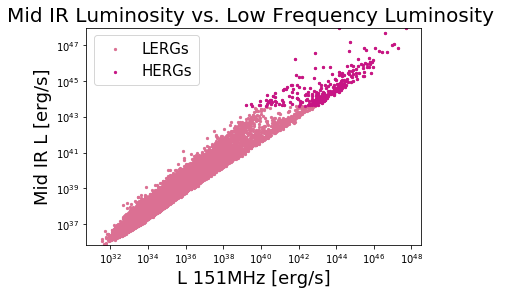

In [10]:
#Limit=[]
#for j in range(len(Pw)):
    #Limit.append(4e43)

    
#logPlot = plt.gca()
#logPlot.loglog(Pw,Limit,'r--',c='black')
plt.scatter(Pw, Pw22,s =5, c='palevioletred',label='LERGs')
plt.scatter(Pw_adj1 ,Pw_adj ,s =5 ,c='mediumvioletred',label='HERGs')
plt.yscale('log')
plt.xscale('log')
plt.ylim(0,1e48)
plt.title('Mid IR Luminosity vs. Low Frequency Luminosity ',fontsize = 20)
plt.legend(loc=2, prop={'size': 15})
plt.xlabel('L 151MHz [erg/s]', fontsize = 18)
plt.ylabel('Mid IR L [erg/s]', fontsize = 18)
plt.show()

In [10]:
## Convert erg to J >>> WHz^-1
L_low_f = Pw_adj1*1e-7
L_mid_IR = Pw_adj*1e-7
L_opti = Pw_g_H*1e-7

z_new  = z[:5776,]


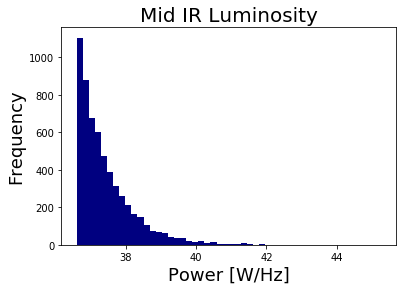

In [16]:
import plotly.plotly as py
plt.hist(np.log10(L_mid_IR), color= "navy", bins = 50)
plt.title("Mid IR Luminosity", fontsize = 20)
plt.xlabel("Power [W/Hz]", fontsize= 18)
plt.ylabel("Frequency", fontsize = 18)
#plt.xscale('log')
#plt.yscale('log')
#plt.xlim(0,1e37)
rwidth=20
fig = plt.gcf()

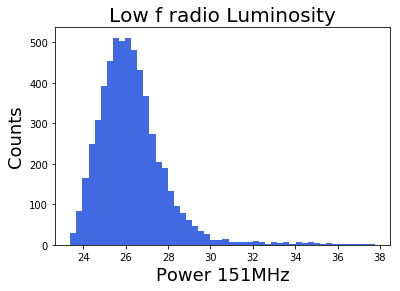

In [17]:
plt.hist(np.log10(L_low_f), facecolor= 'royalblue', bins = 50)
plt.title("Low f radio Luminosity", fontsize = 20)
plt.xlabel("Power 151MHz", fontsize= 18)
plt.ylabel("Counts", fontsize = 18)
#plt.xscale('log')
#plt.xlim(1e34,1e36)
fig = plt.gcf()

In [18]:
#Pw_adj.tolist()

Text(0,0.5,'Power [W$Hz^-1$]')

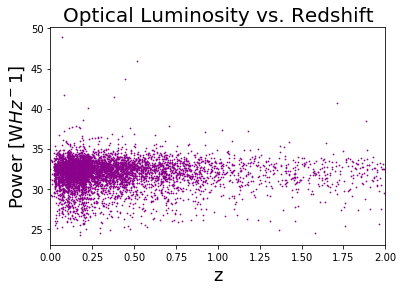

In [19]:
plt.scatter(z_new, np.log10(L_opti), s = 0.5, c='darkmagenta')
#plt.yscale('log')
plt.title('Optical Luminosity vs. Redshift',size=20)
#plt.ylim(0,1e38)
plt.xlim(0,2)
plt.xlabel("z",size=18)
plt.ylabel("Power [W$Hz^-1$]",size=18)

Text(0,0.5,'Power [W$Hz^-1$]')

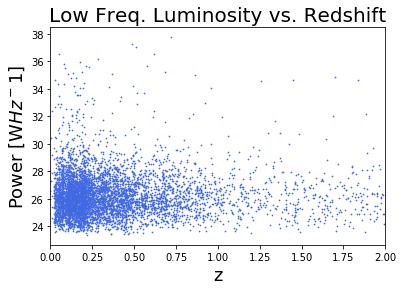

In [705]:
plt.scatter(z_new, np.log10(L_low_f), s = 0.5, c='royalblue')
plt.xlim(0,2)
#plt.ylim(1e21,1e35)
#plt.yscale('log')
plt.title('Low Freq. Luminosity vs. Redshift',size=20)
plt.xlabel("z",size=18)
plt.ylabel("Power [W$Hz^-1$]",size=18)

In [24]:
a  = np.log10(1+z)

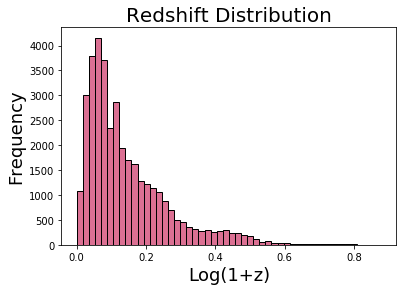

In [43]:
plt.hist(a, color= "palevioletred", bins = 50)
plt.hist(a, color= "navy", bins = 50, fill = False)
plt.title("Redshift Distribution", fontsize = 20)
plt.xlabel("Log(1+z)", fontsize= 18)
plt.ylabel("Frequency", fontsize = 18)
#plt.xscale('log')
#plt.yscale('log')
rwidth=10
fig = plt.gcf()

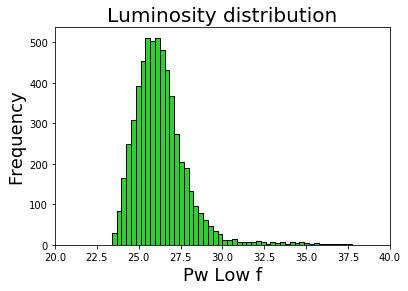

In [181]:
b= np.log10(L_low_f)

plt.hist(b, color= "limegreen", bins = 50)
plt.hist(b, color= "navy", bins = 50, fill = False)
plt.title("Luminosity distribution", fontsize = 20)
plt.xlabel("Pw Low f", fontsize= 18)
plt.ylabel("Frequency", fontsize = 18)
plt.xlim(20,40)
rwidth=10
fig = plt.gcf()

# Result of Crossmatch

In [11]:
hdul2 = fits.open('crossmatch1.fits')
data = hdul2[1].data
flux = data.field('Total_flux') # Obtain the total flux column 
redshift = data.field('z_best') # Obtain redshift column
flux_22 = data.field('w4Flux') # Obtain 22 microns flux
flux_g = data.field('gFApflux') # Obtain flux for g band

In [12]:
Q_d = array(cosmo.luminosity_distance([flux_g])*3.08567758e24) 
pw_g  = (power(Q_d,flux_g,redshift))
#Quasar_opti_P = Pw_g*1e-7


Lum_D = array(cosmo.luminosity_distance([flux])*3.08567758e24) 
pw = (power(Lum_D,flux,redshift))
#(1+redshift)**(-0.7)

Lum_D22 = array(cosmo.luminosity_distance([flux_22])*3.08567758e24)
pw22 = (power(Lum_D22,flux_22,redshift))

Adj = np.where(pw22>=4e43)

# FIND DATA FOR QUASARS

Quasar_mid_IR = array((pw22[Adj])*1e-7)
Quasar_Low_P = array((pw[Adj])*1e-7) 
Quasar_opti_P = array((pw_g[Adj])*1e-7)

z_QSO = redshift[:432,]


In [13]:
# FIND DATA FOR RADIO GALAXIES


RG_low = (set(L_low_f)-set(Quasar_Low_P))
P_RG_low  = array(list(RG_low))

RG_IR = (set(L_mid_IR)-set(Quasar_mid_IR))
P_RG_IR  = array(list(RG_IR))

RG_opti = (set(L_opti)-set(Quasar_opti_P))
P_RG_opti  = array(list(RG_opti))


z_RG = z[:5344,]

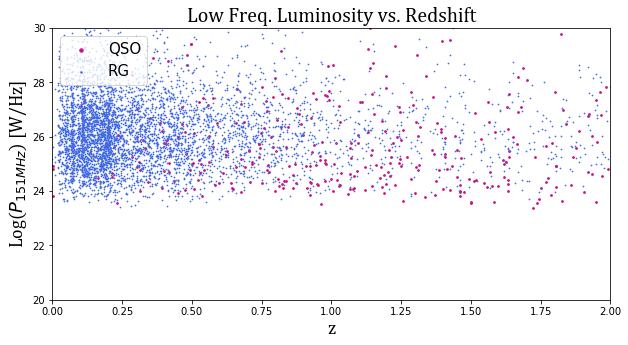

In [55]:
bsfont = {'fontname':'Cambria Math'}
plt.figure(figsize=(10,5))
plt.scatter(z_QSO, np.log10(Quasar_Low_P), s = 3, c='mediumvioletred',label = 'QSO')
plt.scatter(z_RG, np.log10(P_RG_low), s = 0.5, c='royalblue', label = 'RG')
plt.xlim(0,2)
plt.ylim(20,30)
#plt.yscale('log')
plt.title('Low Freq. Luminosity vs. Redshift',size=20,**bsfont)
plt.xlabel("z",size=18,**bsfont)
plt.legend(loc=2, prop={'size': 15},markerscale=2)
plt.ylabel("Log($P_{151MHz}$) [W/Hz]",size=18,**bsfont)
plt.savefig('P vs z.png')
plt.show()

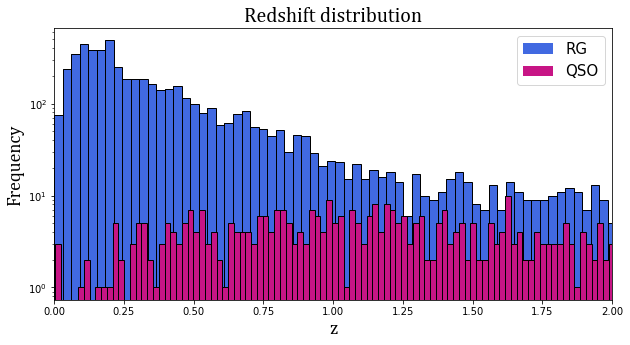

In [50]:
plt.figure(figsize=(10,5))
plt.hist(z_RG, color= "royalblue", bins = 200, label='RG')
plt.hist(z_RG, color= "royalblue", bins = 200, fill = False)
plt.hist(z_QSO, color= "mediumvioletred", bins = 200,label='QSO')
plt.hist(z_QSO, color= "royalblue", bins = 200, fill = False)
plt.title("Redshift distribution", fontsize = 20,**bsfont)
plt.yscale('log')
plt.xlabel("z", fontsize= 18,**bsfont)
plt.ylabel("Frequency", fontsize = 18,**bsfont)
rwidth=10
plt.legend(loc=1, prop={'size': 15})
plt.xlim(0,2)
plt.savefig('z.png')
fig = plt.gcf()

# Find Linear Size

In [22]:
# Import desired parameters >>> DC_maj and LGZ size

dc_maj = data.field('DC_maj')
DC_maj = array(dc_maj)
A = data.field('LGZ_size')
LGZ = np.nan_to_num(A)
DC_MAJ = (np.nan_to_num(DC_maj))*2


# Calculate angular distance using python function

ad_QSO = array(cosmo.angular_diameter_distance(z_QSO)) #This is in Kiloparsecs
ad_RG = array(cosmo.angular_diameter_distance(z_RG))



In [23]:
dc_rg = (set(dc_major)-set(DC_maj))
DC_RG1  = array(list(dc_rg))

lgz_rg = (set(lgz)-set(A))
LGZ_RG1  = array(list(lgz_rg))

DC_RG = (np.nan_to_num(DC_RG1))*2   ### Deconvolved size for radio galaxies

LGZ_RG  = np.nan_to_num(LGZ_RG1)    ### LGZ for radio galaxies

In [28]:
## Loop that chooses LGZ instead of DC_maj for Quasars
for i in np.arange(len(DC_MAJ)):
    if (LGZ[i]==0):
        print (DC_MAJ)
    else:
        DC_MAJ[i] = LGZ[i]


[ 0.         39.33596014  0.         ... 64.66238472 19.43694895
 11.81471584]
[ 0.         39.33596014  0.         ... 64.66238472 19.43694895
 11.81471584]
[ 0.         39.33596014  0.         ... 64.66238472 19.43694895
 11.81471584]
[ 0.         39.33596014  0.         ... 64.66238472 19.43694895
 11.81471584]
[ 0.         39.33596014  0.         ... 64.66238472 19.43694895
 11.81471584]
[ 0.         39.33596014  0.         ... 64.66238472 19.43694895
 11.81471584]
[ 0.         39.33596014  0.         ... 64.66238472 19.43694895
 11.81471584]
[ 0.         39.33596014  0.         ... 64.66238472 19.43694895
 11.81471584]
[ 0.         39.33596014  0.         ... 64.66238472 19.43694895
 11.81471584]
[ 0.         39.33596014  0.         ... 64.66238472 19.43694895
 11.81471584]
[ 0.         39.33596014  0.         ... 64.66238472 19.43694895
 11.81471584]
[ 0.         39.33596014  0.         ... 64.66238472 19.43694895
 11.81471584]
[ 0.         39.33596014  0.         ... 64.66238472

In [29]:
for i in np.arange(len(DC_RG)):
    if (LGZ_RG[i]==0):
        print (DC_RG)
    else:
        DC_RG[i] = LGZ_RG[i]

[ 0.          0.          0.         ...  7.81678643 14.21552981
 28.68478919]
[ 0.          0.          0.         ...  7.81678643 14.21552981
 28.68478919]
[ 0.          0.          0.         ...  7.81678643 14.21552981
 28.68478919]
[ 0.          0.          0.         ...  7.81678643 14.21552981
 28.68478919]
[ 0.          0.          0.         ...  7.81678643 14.21552981
 28.68478919]
[ 0.          0.          0.         ...  7.81678643 14.21552981
 28.68478919]
[ 0.          0.          0.         ...  7.81678643 14.21552981
 28.68478919]
[ 0.          0.          0.         ...  7.81678643 14.21552981
 28.68478919]
[ 0.          0.          0.         ...  7.81678643 14.21552981
 28.68478919]
[ 0.          0.          0.         ...  7.81678643 14.21552981
 28.68478919]
[ 0.          0.          0.         ...  7.81678643 14.21552981
 28.68478919]
[ 0.          0.          0.         ...  7.81678643 14.21552981
 28.68478919]
[ 0.          0.          0.         ...  7.81678643

In [30]:
def LZ(ang_d,dc):
    linear_size = ang_d*dc*(np.pi/180)
    return linear_size

In [41]:
a = DC_MAJ[DC_MAJ != 0]
a1 = DC_MAJ[:432,]
b = DC_RG[DC_RG != 0]
b1 = DC_RG[:5344,]

L_QSO = array(LZ(ad_QSO,a1))
L_RG = array(LZ(ad_RG,b1))

In [42]:
c1 = L_QSO[:200,]
d1 = L_RG[:200,]


bins_QSO = np.linspace(0, 1.0, num=200)
bins_RG = np.linspace(0,1.0,num = 200)

In [43]:
c1.sort()
d1.sort()

Text(0,0.5,'Fraction of Sources')

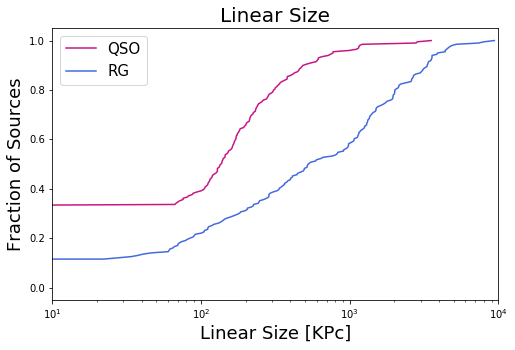

In [45]:
plt.figure(figsize=(8,5))
plt.plot(c1,bins_QSO, c = 'mediumvioletred', label = 'QSO')
plt.plot(d1,bins_RG, c='royalblue', label = 'RG')
plt.xscale('log')
plt.xlim(1e1,1e4)
plt.legend(loc=2, prop={'size': 15})
plt.title('Linear Size', fontsize= 20)
plt.xlabel('Linear Size [KPc]', fontsize =18)
plt.ylabel('Fraction of Sources', fontsize =18)

In [366]:
# Find median value of radio galaxies and quasars
import statistics


m_RG = statistics.median(d1)
m_QSO = statistics.median(c1)

#Find ratio R
R = m_RG/m_QSO
R

3.871928807848142

In [381]:
# Create range of Theta C and calculate new ratio

θ_c = np.linspace(0, 90, num=90) ### radians

#Define function to evaluate R

def Num(theta):
    num  = np.sin(np.arccos(np.cos((np.deg2rad(theta)))/2))
    return num

def Denom(theta):
    denom1 = np.sin(np.arccos((1+np.cos(np.deg2rad(theta)))/2))
    return denom1


In [384]:
R_θ =Num(θ_c)/Denom(θ_c)

R_θ_c = np.nan_to_num(R_θ) 

In [385]:
R_θ_c

array([1.79769313e+308, 6.93988693e+001, 3.47082138e+001, 2.31485595e+001,
       1.73716507e+001, 1.39078347e+001, 1.16005595e+001, 9.95415872e+000,
       8.72079830e+000, 7.76279187e+000, 6.99752687e+000, 6.37243106e+000,
       5.85245570e+000, 5.41333577e+000, 5.03773866e+000, 4.71295336e+000,
       4.42944625e+000, 4.17992657e+000, 3.95872340e+000, 3.76135945e+000,
       3.58425261e+000, 3.42450284e+000, 3.27973719e+000, 3.14799520e+000,
       3.02764296e+000, 2.91730787e+000, 2.81582833e+000, 2.72221471e+000,
       2.63561866e+000, 2.55530873e+000, 2.48065090e+000, 2.41109291e+000,
       2.34615144e+000, 2.28540171e+000, 2.22846885e+000, 2.17502079e+000,
       2.12476234e+000, 2.07743017e+000, 2.03278866e+000, 1.99062632e+000,
       1.95075281e+000, 1.91299635e+000, 1.87720149e+000, 1.84322728e+000,
       1.81094555e+000, 1.78023953e+000, 1.75100263e+000, 1.72313732e+000,
       1.69655423e+000, 1.67117128e+000, 1.64691297e+000, 1.62370975e+000,
       1.60149744e+000, 1

# Bins division for redshift

In [23]:
## Bins >>> 0.25,0.50,0.75,1.00, 1.25, 1.50,1.75,2.00

def binselect(z,x,y):
    select = z[(z >= x) & (z <= y)]
    return select
binselect(z_QSO,0.8,0.9).shape

Total_z = np.concatenate((z_RG,z_QSO))
Total_P = np.concatenate((P_RG_low,Quasar_Low_P))

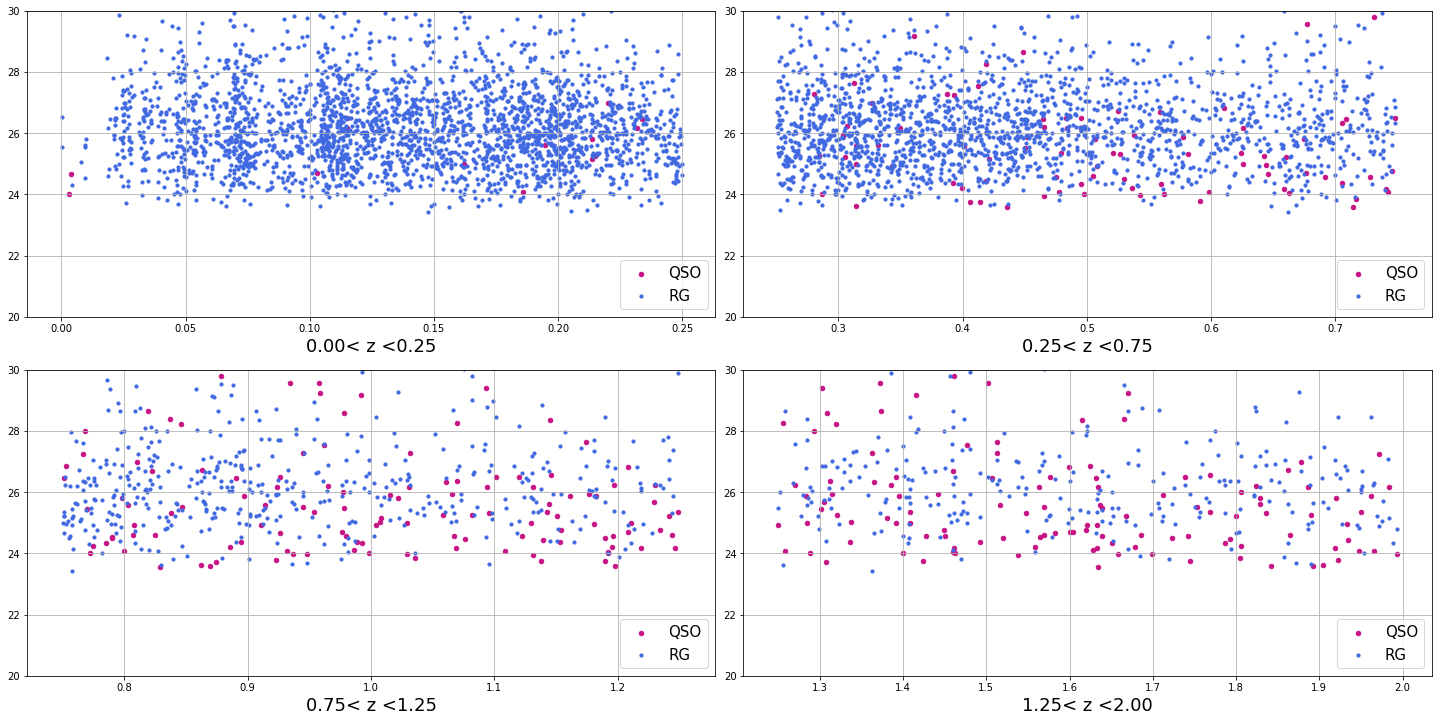

In [15]:

f = plt.figure(figsize=(20,10))
ax = f.add_subplot(221)
ax2 = f.add_subplot(222)
ax3 =  f.add_subplot(223)
ax4 =  f.add_subplot(224)


ax.scatter(binselect(z_QSO,0,0.25), np.log10(Quasar_Low_P[:16,]), s = 20, c='mediumvioletred',label = 'QSO')
ax.scatter(binselect(z_RG,0.0,0.25), np.log10(P_RG_low[:2650,]), s = 10, c='royalblue',label = 'RG')
ax.set_ylim(20,30)
ax.set_xlabel('0.00< z <0.25',fontsize = 18)
ax.legend(loc=4, prop={'size': 15})
ax.grid()

ax2.scatter(binselect(z_QSO,0.25,0.75), np.log10(Quasar_Low_P[:91,]), s = 20, c='mediumvioletred',label = 'QSO')
ax2.scatter(binselect(z_RG,0.25,0.75), np.log10(P_RG_low[:1861,]), s = 10, c='royalblue',label = 'RG')
ax2.set_ylim(20,30)
ax2.set_xlabel('0.25< z <0.75',fontsize = 18)
ax2.legend(loc=4, prop={'size': 15})
ax2.grid()

ax3.scatter(binselect(z_QSO,0.75,1.25), np.log10(Quasar_Low_P[:132,]), s = 20, c='mediumvioletred',label = 'QSO')
ax3.scatter(binselect(z_RG,0.75,1.25), np.log10(P_RG_low[:456,]), s = 10, c='royalblue',label = 'RG')
ax3.set_ylim(20,30)
ax3.set_xlabel('0.75< z <1.25',fontsize = 18)
ax3.legend(loc=4, prop={'size': 15})
ax3.grid()

ax4.scatter(binselect(z_QSO,1.25,2.00), np.log10(Quasar_Low_P[:131,]), s = 20, c='mediumvioletred',label = 'QSO')
ax4.scatter(binselect(z_RG,1.25,2.00), np.log10(P_RG_low[:264,]), s = 10, c='royalblue',label = 'RG')
ax4.set_ylim(20,30)
ax4.set_xlabel('1.25< z <2.00',fontsize = 18)
ax4.legend(loc=4, prop={'size': 15})
ax4.grid()

plt.tight_layout(pad=0.6, w_pad=0.5, h_pad=1.0)



In [21]:
binselect(Total_z,1.25,2.00).shape

(395,)

# Bins Division for Power

In [25]:
def Binselect(p,q,r):
    Select = p[(p >= q) & (p <= r)]
    return Select
Binselect(Total_P,1e23,1e26).shape

(2742,)

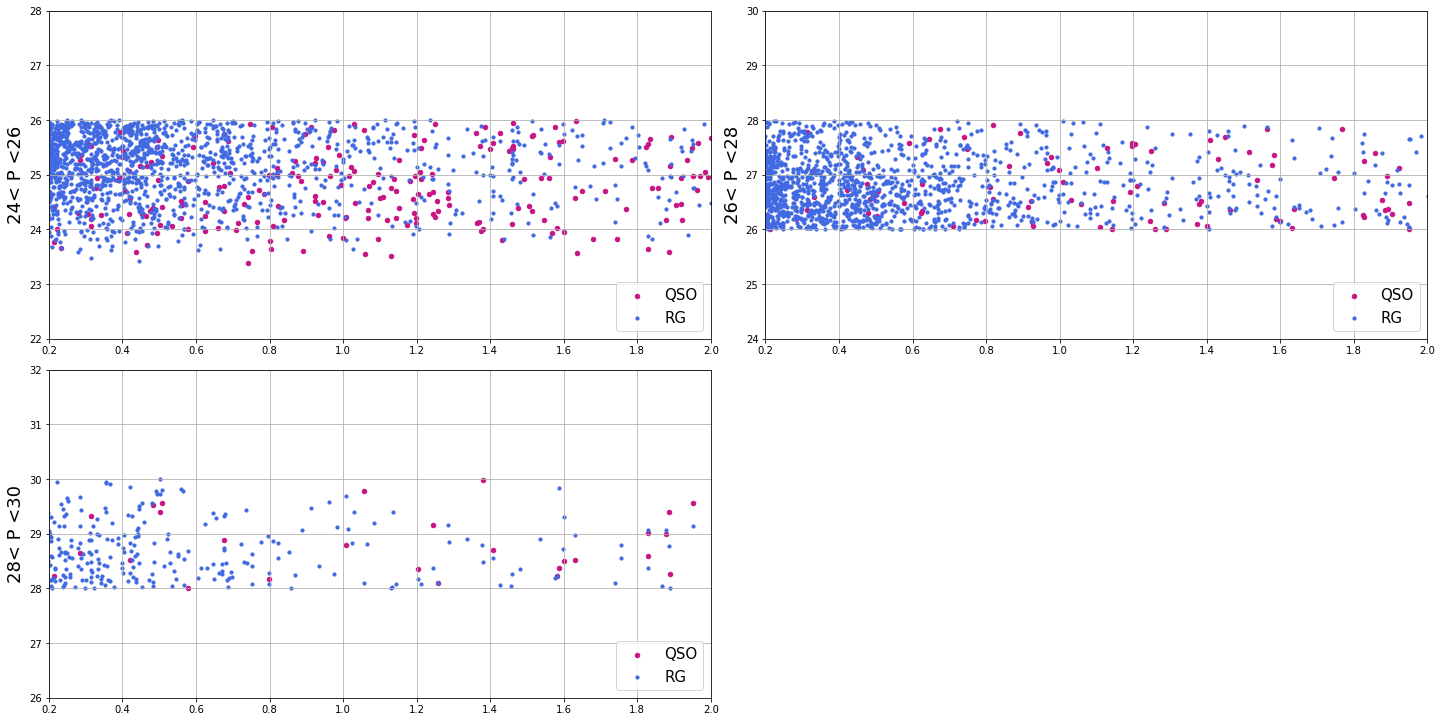

In [26]:
f = plt.figure(figsize=(20,10))
ax = f.add_subplot(221)
ax2 = f.add_subplot(222)
ax4 =  f.add_subplot(223)


ax.scatter(z_QSO[:254,], np.log10(Binselect(Quasar_Low_P,1e23,1e26)), s = 20, c='mediumvioletred',label = 'QSO')
ax.scatter(z_RG[:2488,], np.log10(Binselect(P_RG_low,1e23,1e26)), s = 10, c='royalblue',label = 'RG')
ax.set_ylim(22,28)
ax.set_xlim(0.2,2)
ax.set_ylabel('24< P <26',fontsize = 18)
ax.legend(loc=4, prop={'size': 15})
ax.grid()

ax2.scatter(z_QSO[:106,], np.log10(Binselect(Quasar_Low_P,1e26,1e28)), s = 20, c='mediumvioletred',label = 'QSO')
ax2.scatter(z_RG[:2313,], np.log10(Binselect(P_RG_low,1e26,1e28)), s = 10, c='royalblue',label = 'RG')
ax2.set_ylim(24,30)
ax2.set_xlim(0.2,2)
ax2.set_ylabel('26< P <28',fontsize = 18)
ax2.legend(loc=4, prop={'size': 15})
ax2.grid()

ax4.scatter(z_QSO[:31,], np.log10(Binselect(Quasar_Low_P,1e28,1e30)), s = 20, c='mediumvioletred',label = 'QSO')
ax4.scatter(z_RG[:442,], np.log10(Binselect(P_RG_low,1e28,1e30)), s = 10, c='royalblue',label = 'RG')
ax4.set_ylim(26,32)
ax4.set_xlim(0.2,2)
ax4.set_ylabel('28< P <30',fontsize = 18)
ax4.legend(loc=4, prop={'size': 15})
ax4.grid()

plt.tight_layout(pad=0.6, w_pad=0.5, h_pad=1.0)



In [27]:
Binselect(Total_P,1e23,1e26).shape

(2742,)

In [97]:
#### Square division for Tot sources

P1 = Binselect(Total_P,1e23,1e26)
Z1 = Total_z[:2742,]
Bin1 = np.vstack((P1,Z1)).T

P2 = Binselect(Total_P,1e26,1e28)
Z2 = Total_z[:2419,]
Bin2 = np.vstack((P2,Z2)).T

P3 = Binselect(Total_P,1e28,1e30)
Z3 = Total_z[:473,]
Bin3 = np.vstack((P3,Z3)).T

(Bin3[(Z3 >= 1.8) & (Z3 <= 2.0)])


array([[1.03402091e+28, 1.88960004e+00],
       [1.39348650e+29, 1.95099998e+00],
       [2.33809347e+28, 1.82879996e+00],
       [1.13285145e+28, 1.86750000e+00],
       [6.01352693e+28, 1.88600004e+00],
       [1.16023762e+29, 1.82848132e+00],
       [1.19397426e+29, 1.87800002e+00],
       [1.59225060e+28, 1.86190000e+00]])

In [128]:
P_qso1 =  Binselect(Quasar_Low_P,1e23,1e26)
Z_qso1= z_QSO[:254,]
Bin1_qso = np.vstack((P_qso1,Z_qso1)).T
P_rg1 = Binselect(P_RG_low,1e23,1e26)
Z_rg1= z_RG[:2488,]
Bin1_rg = np.vstack((P_rg1,Z_rg1)).T

P_qso2 =  Binselect(Quasar_Low_P,1e26,1e28)
Z_qso2= z_QSO[:106,]
Bin2_qso = np.vstack((P_qso2,Z_qso2)).T
P_rg2 = Binselect(P_RG_low,1e26,1e28)
Z_rg2= z_RG[:2313,]
Bin2_rg = np.vstack((P_rg2,Z_rg2)).T


P_qso3 =  Binselect(Quasar_Low_P,1e28,1e30)
Z_qso3= z_QSO[:31,]
Bin3_qso = np.vstack((P_qso3,Z_qso3)).T
P_rg3 = Binselect(P_RG_low,1e28,1e30)
Z_rg3 = z_RG[:442,]
Bin3_rg = np.vstack((P_rg3,Z_rg3)).T

In [367]:
Bin1_rg[(Z_rg1 >= 1.25) & (Z_rg1 <= 2.00)].shape, Bin1_qso[(Z_qso1 >= 1.25) & (Z_qso1 <= 2.00)].shape, 123/71
### 23<P<26 && 0.4<z<0.6

((123, 2), (71, 2), 1.732394366197183)

In [365]:
Bin2_rg[(Z_rg2 >= 1.25) & (Z_rg2 <= 2.00)].shape, Bin2_qso[(Z_qso2 >= 1.25) & (Z_qso2 <= 2.00)].shape, 113/34

((113, 2), (34, 2), 3.323529411764706)

In [387]:
Bin3_rg[(Z_rg3 >= 1.25) & (Z_rg3 <= 2)].shape, Bin3_qso[(Z_qso3 >= 1.25) & (Z_qso3 <= 2)].shape, 28/13

((28, 2), (13, 2), 2.1538461538461537)

In [392]:
Q_New = np.concatenate((Bin1_qso[(Z_qso1 >= 1.25) & (Z_qso1 <= 2.00)],Bin2_qso[(Z_qso2 >= 1.25) & (Z_qso2 <= 2.00)],Bin3_qso[(Z_qso3 >= 1.25) & (Z_qso3 <= 2)]),axis = 0)
R_New = np.concatenate((Bin1_rg[(Z_rg1 >= 1.25) & (Z_rg1 <= 2.00)],Bin2_rg[(Z_rg2 >= 1.25) & (Z_rg2 <= 2.00)],Bin3_rg[(Z_rg3 >= 1.25) & (Z_rg3 <= 2)]),axis=0)

In [421]:
P_QSO_New = Q_New[:,0]
z_QSO_New = Q_New[:,1]

P_RG_New = R_New[:,0]
z_RG_New = R_New[:,1]



In [422]:
z_RG.shape

(5344,)